In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from catboost_regressor import CatBoostRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [5]:
cat_model = CatBoostRegressor()
cat_model.set_data(X,y)
Plotters = Plotter()

In [6]:
with open(f'{path}Opt_Model/opt_CAT_model_all_features.pickle', 'rb') as file:
    opt_cat = pickle.load(file)

In [7]:
errores = opt_cat.cv_results_['mean_test_score'][:100]


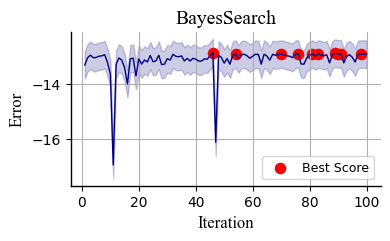

Top 1: Iteration 46, Score -12.8538497086999
Top 2: Iteration 89, Score -12.879238516540394
Top 3: Iteration 91, Score -12.896922863551248
Top 4: Iteration 54, Score -12.905353616895344
Top 5: Iteration 76, Score -12.907648256268843
Top 6: Iteration 70, Score -12.907995743820575
Top 7: Iteration 90, Score -12.909930316689886
Top 8: Iteration 98, Score -12.910098387351502
Top 9: Iteration 83, Score -12.910639807678091
Top 10: Iteration 81, Score -12.911579272750615


In [8]:
Plotters.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [9]:
best_params_cat = cat_model.best_hyper(opt_cat, num_max=100)

In [10]:
best_params_cat


[{'depth': 7,
  'l2_leaf_reg': 19.646652188166914,
  'learning_rate': 0.025271369442422413,
  'n_estimators': 1107},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01856037453684189,
  'n_estimators': 1951},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.0189005155570754,
  'n_estimators': 1821},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2433},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2576},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.031340195609154624,
  'n_estimators': 1256},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2275},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2523},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2700},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.019218724960247152,
  'n_estimators': 1333}]

In [91]:
cat_model.fit_params_train = {
                "early_stopping_rounds": 500,
                #"eval_set": "mae",
                "eval_set": [(cat_model.X_test, cat_model.y_test)],
                "verbose": False
            }

In [97]:
cat_model.fit_params_train = { }

In [ ]:
results, best_model_results, best_model, residual_model = cat_model.trainer_2(params_=best_params_cat[0])

In [16]:
#with open(f'{path}Opt_Model_2/BestModel_CAT_all_features.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}/Opt_Model_2/results_CAT_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)
#with open(f'{path}/Opt_Model_2/residual_model_CAT_model_all_features.pickle', 'wb') as file:
#    pickle.dump(residual_model, file)

In [11]:
with open(f'{path}Opt_Model_2/BestModel_CAT_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model_2/results_CAT_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model_2/residual_model_CAT_model_all_features.pickle', 'rb') as file:
    residual_model =  pickle.load(file)

In [ ]:
results

In [12]:
cat_model.model=model
cat_model.residual_model = residual_model

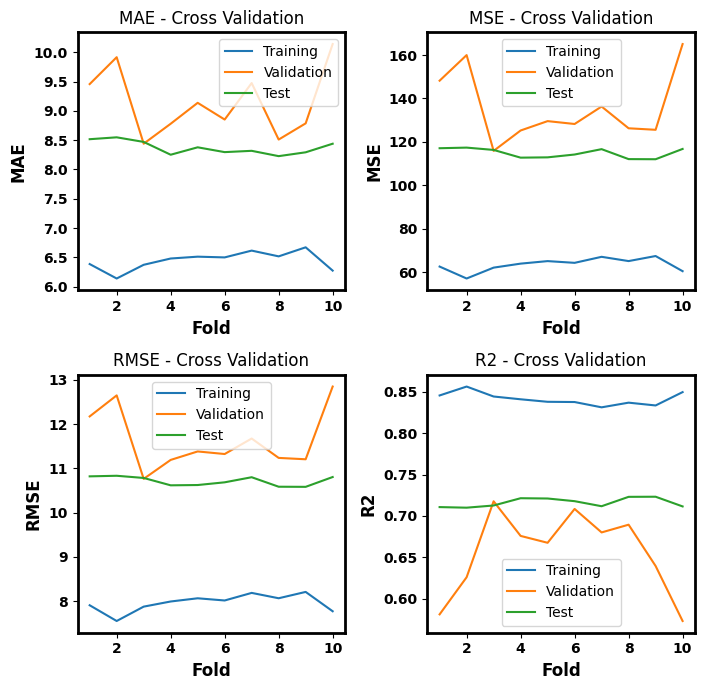

In [12]:
Plotters.plot_metricas_evaluacion(results)

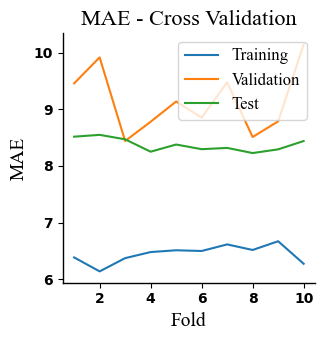

In [14]:
Plotters.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [13]:
y_pred=cat_model.predicter_corrected_2(X_test= cat_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     690.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           7.60e-77
Time:                        20:14:48   Log-Likelihood:                -1000.2
No. Observations:                 276   AIC:                             2004.
Df Residuals:                     274   BIC:                             2012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6153      1.401     10.432      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


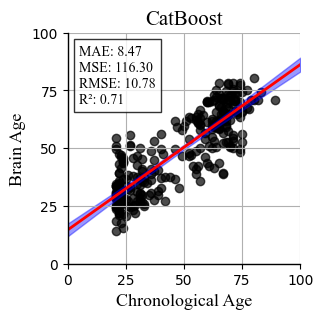

Error medio absoluto: 8.470214182415452
Error cuadrático medio: 116.3032812565355
Raíz del error cuadrático medio: 10.784399902476517
Coeficiente de determinación (R²): 0.7126237099361816


In [14]:
Plotters.plot_regresion(y=y_pred,x= cat_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='CatBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


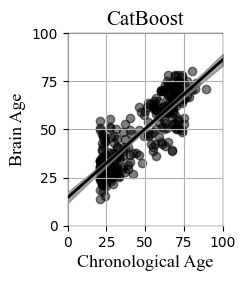

Error medio absoluto: 8.470214182415452
Error cuadrático medio: 116.3032812565355
Raíz del error cuadrático medio: 10.784399902476517
Coeficiente de determinación (R²): 0.7126237099361816


In [15]:
Plotters.plot_regresion(y=y_pred,x= cat_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=(0, 0, 0), title='CatBoost',line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2,y_size=2.5, legend=False, fontsize=13, mode=3, legend_metrics=False)

In [ ]:
with open('y_pred_cat.txt', 'w') as f:
    for value in y_pred:
        f.write(f"{value:.4f}\n")
with open('y_test_cat.txt', 'w') as f:
    for value in cat_model.y_test:
        f.write(f"{value:.4f}\n")

In [18]:
shap_values, shap_summary_sorted = cat_model.feature_importance_shap(X_test=cat_model.X_test,model=cat_model.model)

Importancia de características basada en suma de valores SHAP:
IAF_OCC_left: 559.2210009012028
IAF_OCC_right: 484.74625655271154
Low_subj_spec_EPP_OCC_right: 473.9451102857881
Low_subj_spec_RPD_CING_right: 279.89479543507014
High_subj_spec_EPP_CING_right: 254.07152884929076
Low_subj_spec_EPP_PARIET_right: 253.39131948468653
High_subj_spec_RPD_CING_right: 253.0912309223973
Low_subj_spec_EPP_CING_left: 208.87108894914164
Low_subj_spec_RPD_HPC_left: 198.56079288206604
Low_subj_spec_RPD_OCC_left: 191.64756850372657
IAF_INS_left: 169.66909279429754
Alpha2_canon_RPD_CING_right: 164.78253174791985
Alpha2_canon_EPP_HPC_left: 141.3774892589096
Alpha2_canon_RPD_HPC_left: 140.71735874733105
Low_subj_spec_EPP_PARIET_left: 134.9373583802686
Alpha2_canon_RPD_PARIET_left: 133.09956443441013
Alpha2_canon_EPP_PARIET_left: 127.41980895422644
TF_MFG_right: 122.34915970694189
High_subj_spec_RPD_HPC_left: 122.1673037537557
Low_subj_spec_RPD_CING_left: 119.69038723953068
High_subj_spec_EPP_HPC_left: 119.538

In [15]:
with open(f'{path}Opt_Model_2/shap_values_cat.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_cat.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

In [9]:
with open(f'{path}Opt_Model_2/shap_values_cat.pickle', 'rb') as file:
    shap_values = pickle.load(file)

with open(f'{path}Opt_Model_2/shap_summary_sorted_cat.pickle', 'rb') as file:
    shap_summary_sorted = pickle.load(file)

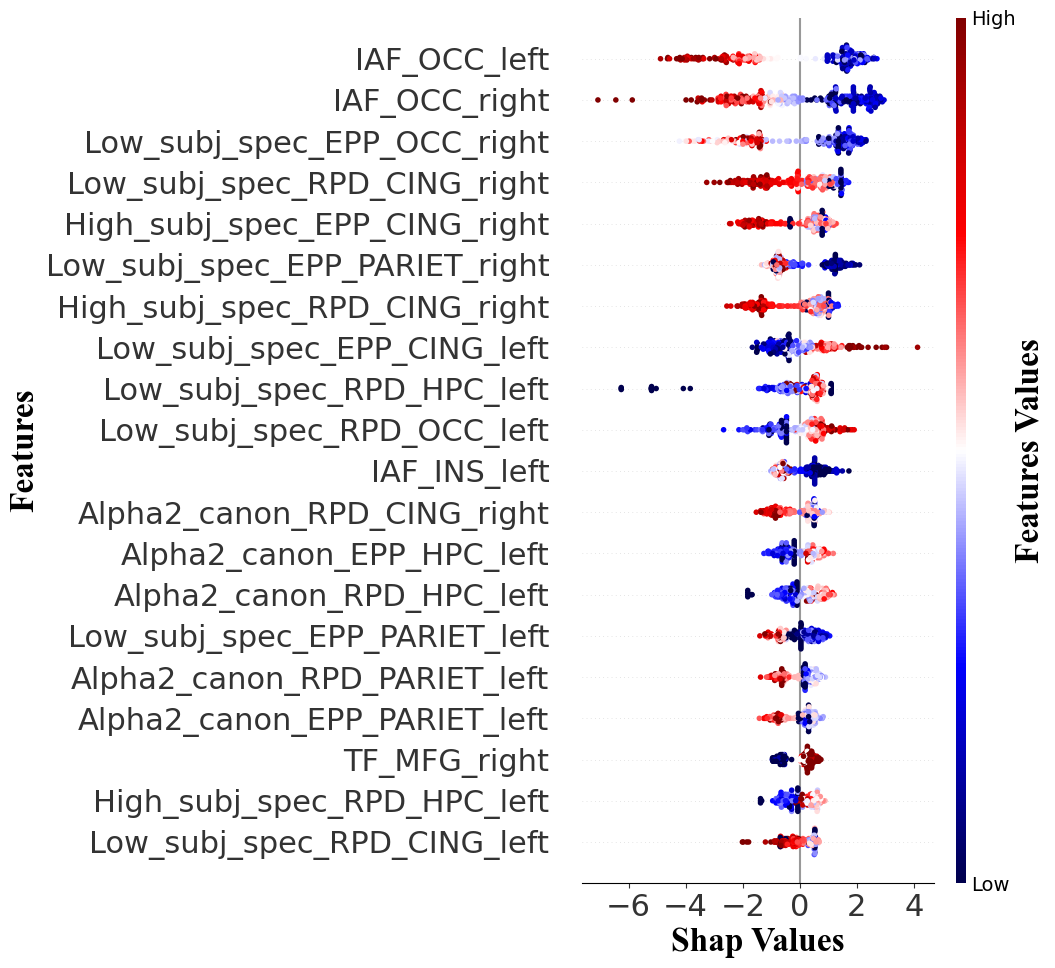

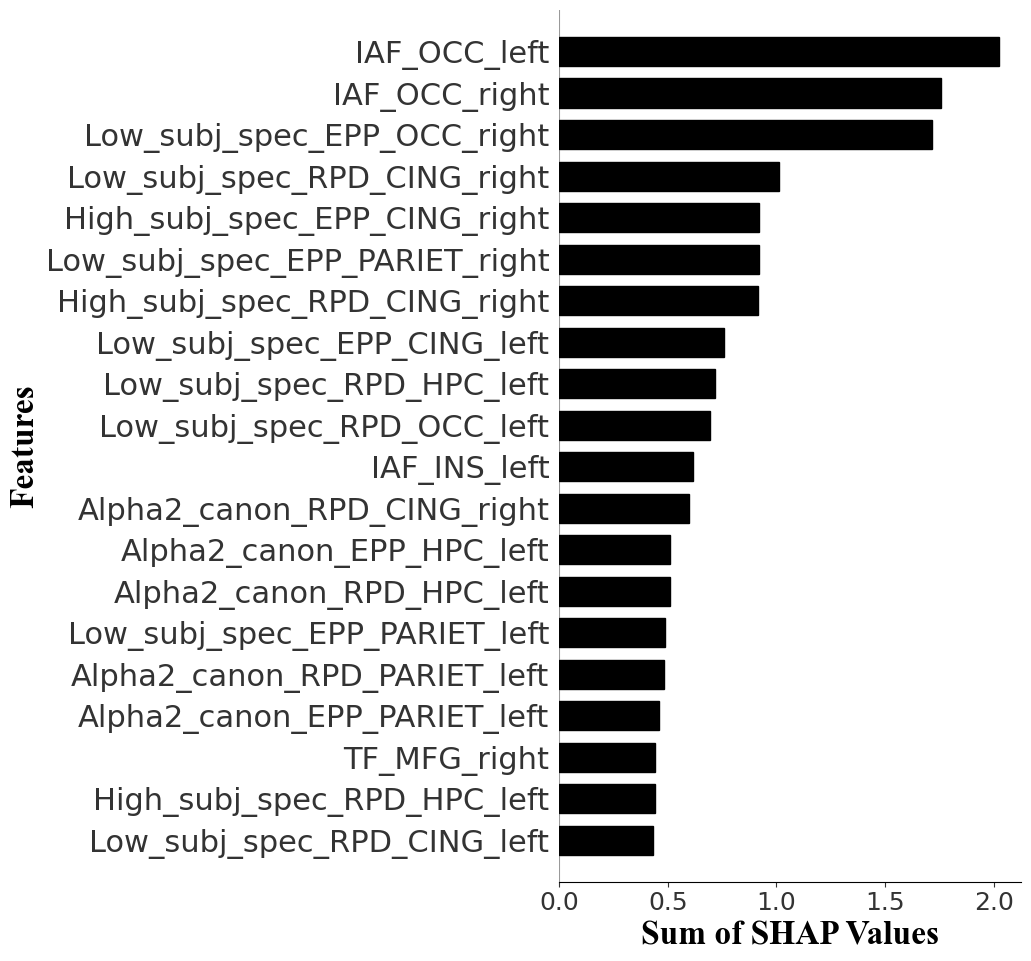

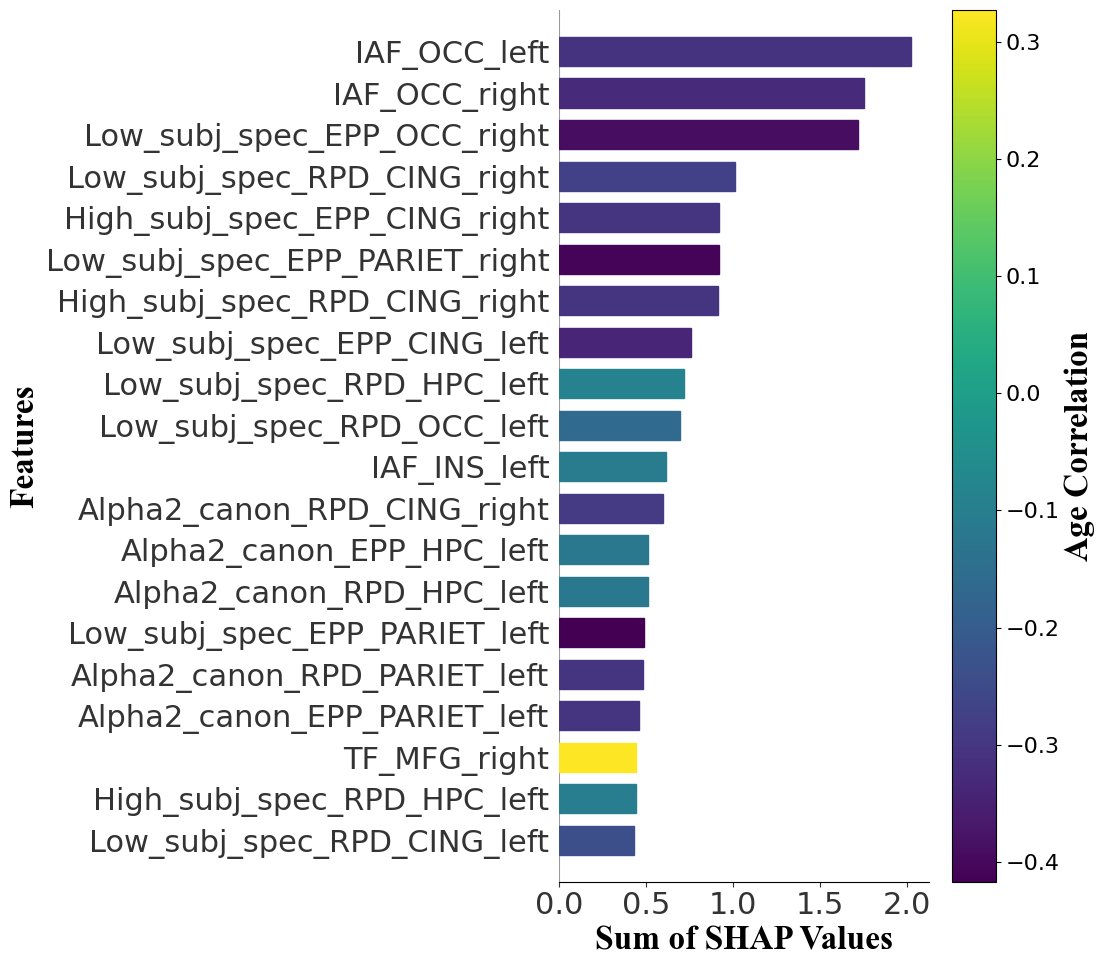

In [17]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=cat_model.X_test,y_test=cat_model.y_test, font= "Times New Roman", fontsize=24, xlabel1='Shap Values', xlabel2='Sum of SHAP Values',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [10]:
shap_por_region_sorted, resultado_normalizado_sorted=cat_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

OCC_right: 1.000000
CING_right: 0.992854
OCC_left: 0.783222
HPC_left: 0.628798
PARIET_left: 0.412496
CING_left: 0.342719
PARIET_right: 0.264310
INS_left: 0.176980
MFG_right: 0.127621


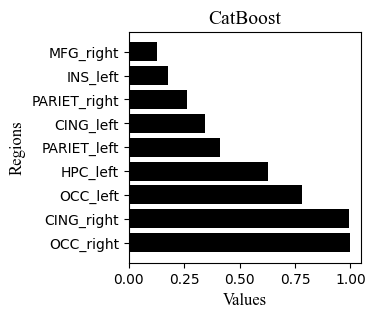

In [13]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color='black', name_set='CatBoost',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


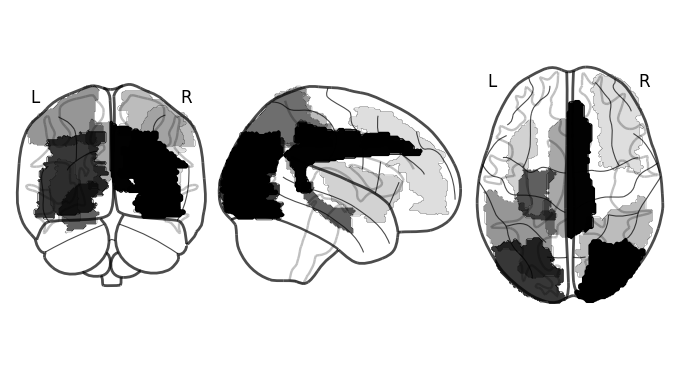

In [20]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color='black')